## Name- Kshitij Kumar

## Loan Sanction Amount Prediction
In this project, we need to predicting loan amount that can be sanctioned to applicant based on available features.

## Data Description

| Columns						| Column Description
|-------------------------------|----------------------------------------------------------------------------------
| Customer ID 					| Represents a unique identification number of a customer
| Name							| Represents the name of a customer
| Gender						| Represents the gender of a customer
| Age							| Represents the age of a customer
| Income (USD)					| Represents the income of a customer
| Income Stability				| Represents whether a customer has a stable source of income
| Profession					| Represents the profession of a customer
| Type of Employment			| Represents the type of employment of a customer
| Location						| Represents the current location that a customer resides
| Loan Amount Request (USD)		| Represents the loan amount requested by a customer
| Current Loan Expenses (USD)	| If a customer has any current active loans, then this represents the amount that a spends on these loans (monthly)
| Expense Type 1				| Represents a type of expense that a customer spends on (monthly)
| Expense Type 2				| Represents a type of expense that a customer spends on (monthly)
| Dependents					| Represents whether a customer has any dependencies (spouse, parents, siblings, children, etc.)
| Credit Score					| Represents the credit score of a customer
| No. of Defaults				| Represents the number of time a customer has defaulted
| Has Active Credit Card		| Represents if a customer has any active credit cards or not
| Property ID					| Represents an identification number of a property
| Property Age					| Represents the age of a property
| Property Type					| Represents the type of property
| Property Location				| Represents the location of a property
| Co-Applicant					| Represents whether a customer has co-applicants
| Property Price				| Represents the selling price of a property
| Loan Sanction Amount (USD)	| Represents the loan sanctioned amount for a customer


## Steps Followed in this Data Science Project
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Evaluation

### 1.Exploratory Data Analysis

#### Importing library numpy,pandas,matplotlib and seaborn and reading the csv file

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [294]:
df=pd.read_csv("train.csv")
df.head()

,Customer ID,Name,Gender,Age,Income_USD,Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request_(USD),...,Credit_Score,No_of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [296]:
df.shape

(30000, 24)

#### In Data Analysis we will analyze to find out the below stuff:
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers

### a1.Finding the missing values in each column

In [297]:
df.isnull().mean()*100

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income_USD                     15.253333
Income_Stability                5.610000
Profession                      0.000000
Type_of_Employment             24.233333
Location                        0.000000
Loan_Amount_Request_(USD)       0.000000
Current_Loan_Expenses_(USD)     0.573333
Expense_Type_1                  0.000000
Expense_Type_2                  0.000000
Dependents                      8.310000
Credit_Score                    5.676667
No_of_Defaults                  0.000000
Has_Active_Credit_Card          5.220000
Property_ID                     0.000000
Property_Age                   16.166667
Property_Type                   0.000000
Property_Location               1.186667
Co-Applicant                    0.000000
Property_Price                  0.000000
Loan_Sanction_Amount_(USD)      1.133333
dtype: float64

Taking out the type of data

In [298]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income_USD                     float64
Income_Stability                object
Profession                      object
Type_of_Employment              object
Location                        object
Loan_Amount_Request_(USD)      float64
Current_Loan_Expenses_(USD)    float64
Expense_Type_1                  object
Expense_Type_2                  object
Dependents                     float64
Credit_Score                   float64
No_of_Defaults                   int64
Has_Active_Credit_Card          object
Property_ID                      int64
Property_Age                   float64
Property_Type                    int64
Property_Location               object
Co-Applicant                     int64
Property_Price                 float64
Loan_Sanction_Amount_(USD)     float64
dtype: object

Finding the number of distinct values in each column

In [299]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Customer Id: 30000
1. Name: 30000
2. Gender: 2
3. Age: 48
4. Income_Usd: 24429
5. Income_Stability: 2
6. Profession: 8
7. Type_Of_Employment: 18
8. Location: 3
9. Loan_Amount_Request_(Usd): 29982
10. Current_Loan_Expenses_(Usd): 24041
11. Expense_Type_1: 2
12. Expense_Type_2: 2
13. Dependents: 10
14. Credit_Score: 17586
15. No_Of_Defaults: 2
16. Has_Active_Credit_Card: 3
17. Property_Id: 999
18. Property_Age: 24179
19. Property_Type: 4
20. Property_Location: 3
21. Co-Applicant: 3
22. Property_Price: 29632
23. Loan_Sanction_Amount_(Usd): 21450


In [300]:
df=df.drop(['Type_of_Employment'],axis=1) # As more than 25% of missing data
len(df.columns)

23

### a2.Finding the Numerical Columns in the dataset

In [301]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  13


,Age,Income_USD,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Dependents,Credit_Score,No_of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,1933.05,4,1,119933.46,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,4952.91,2,1,54791.00,37469.98
2,65,988.19,45593.04,171.95,1.0,833.15,0,546,988.19,2,0,72440.58,36474.43
3,65,NaN,80057.92,298.54,2.0,832.70,1,890,NaN,2,1,121441.51,56040.54
4,31,2614.77,113858.89,491.41,NaN,745.55,1,715,2614.77,4,1,208567.91,74008.28


Numerical variables are usually of 2 type- Continous variable and Discrete Variables

In [302]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)
df[discrete_feature].head()

Discrete Variables Count: 4
['Dependents', 'No_of_Defaults', 'Property_Type', 'Co-Applicant']


,Dependents,No_of_Defaults,Property_Type,Co-Applicant
0,3.0,0,4,1
1,1.0,0,2,1
2,1.0,0,2,0
3,2.0,1,2,1
4,NaN,1,4,1


Continuous Variable

In [303]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


### a3. Distribution of the Numerical Variables

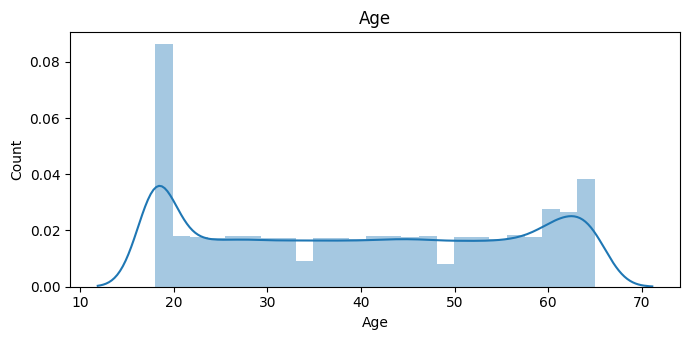

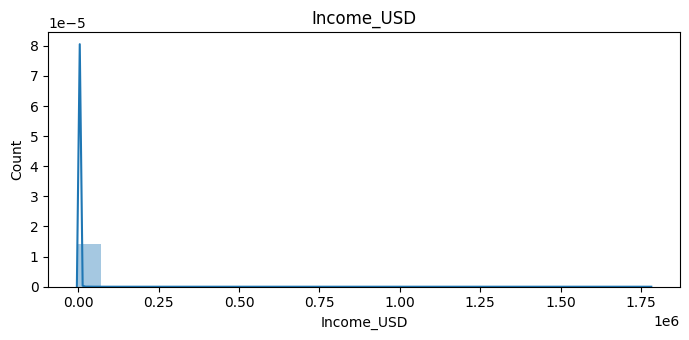

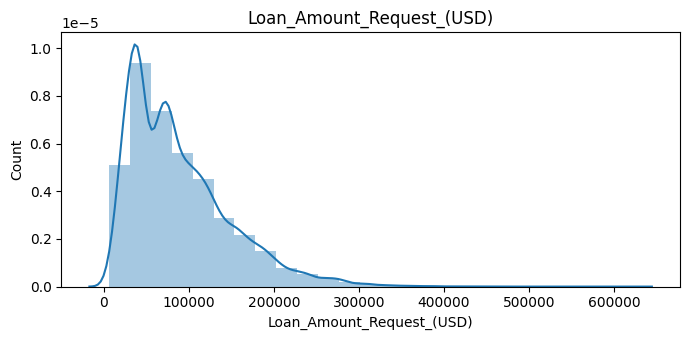

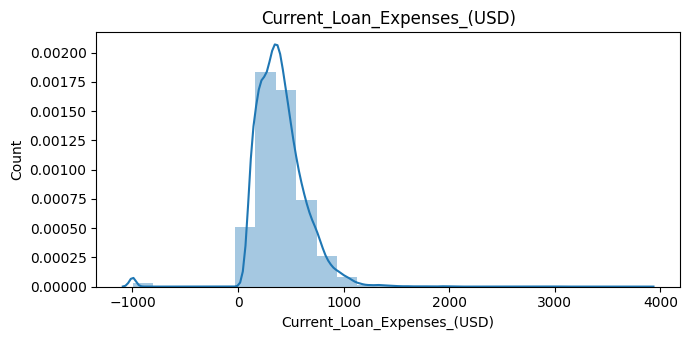

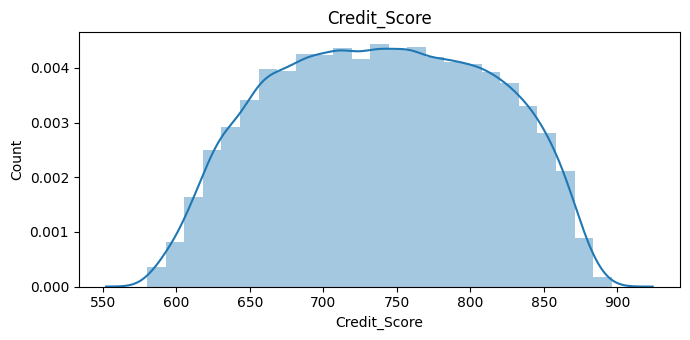

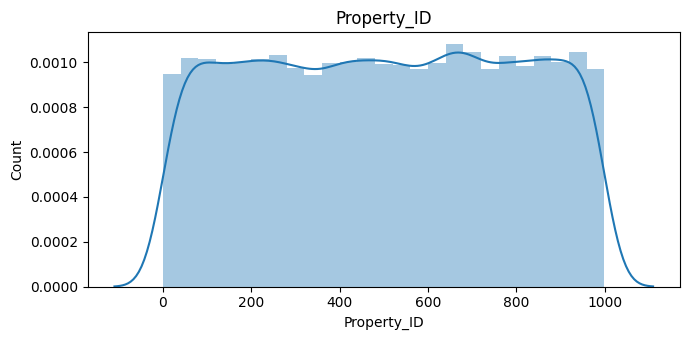

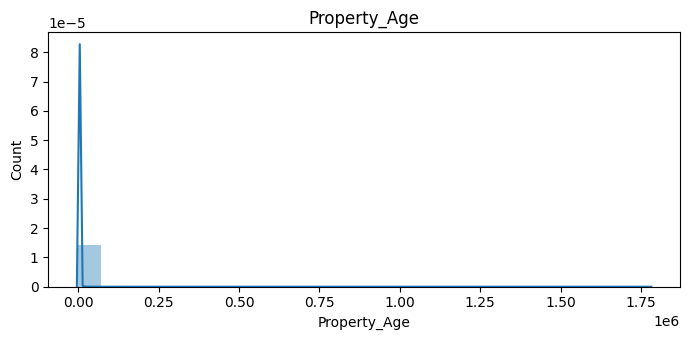

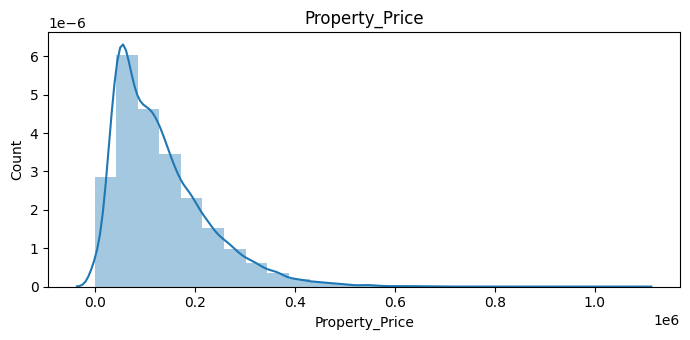

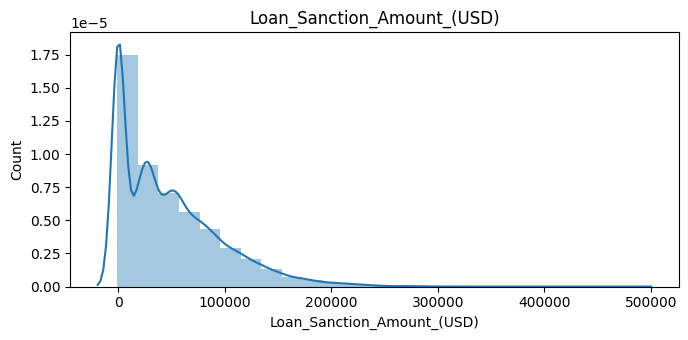

In [304]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    sns.distplot(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### a4.Finding the Categorical columns in the dataset

In [305]:
# list of categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))
# visualise the categorical variables
df[categorical_features].head()

Number of categorical variables:  10


,Customer ID,Name,Gender,Income_Stability,Profession,Location,Expense_Type_1,Expense_Type_2,Has_Active_Credit_Card,Property_Location
0,C-36995,Frederica Shealy,F,Low,Working,Semi-Urban,N,N,NaN,Rural
1,C-33999,America Calderone,M,Low,Working,Semi-Urban,N,Y,Unpossessed,Rural
2,C-3770,Rosetta Verne,F,High,Pensioner,Semi-Urban,N,Y,Unpossessed,Urban
3,C-26480,Zoe Chitty,F,High,Pensioner,Rural,N,Y,Unpossessed,Semi-Urban
4,C-23459,Afton Venema,F,Low,Working,Semi-Urban,N,Y,Active,Semi-Urban


### a5. Cardinality of Categorical Variables

In [306]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Customer ID and number of categories are 30000
The feature is Name and number of categories are 30000
The feature is Gender and number of categories are 3
The feature is Income_Stability and number of categories are 3
The feature is Profession and number of categories are 8
The feature is Location and number of categories are 3
The feature is Expense_Type_1 and number of categories are 2
The feature is Expense_Type_2 and number of categories are 2
The feature is Has_Active_Credit_Card and number of categories are 4
The feature is Property_Location and number of categories are 4


### a6.Outliers detection using Boxplot

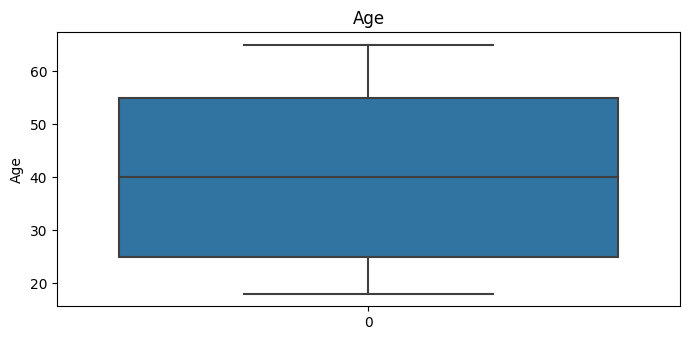

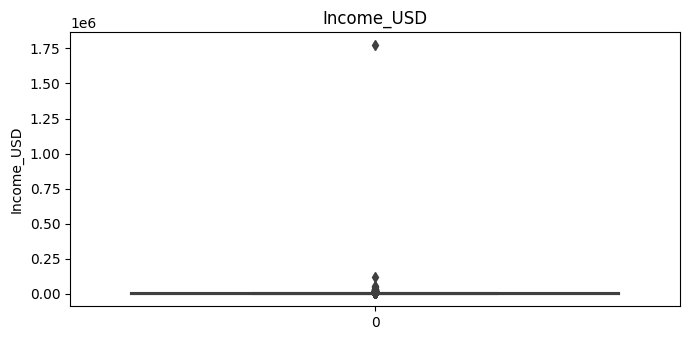

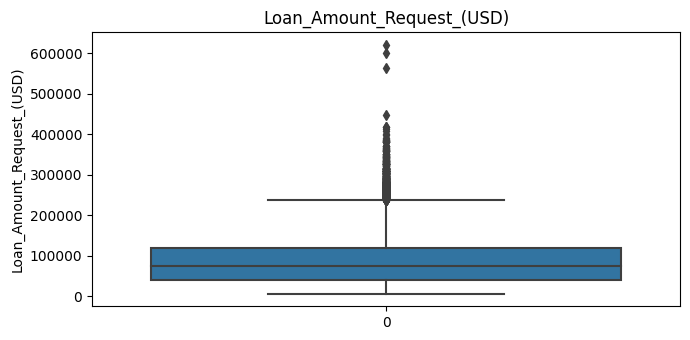

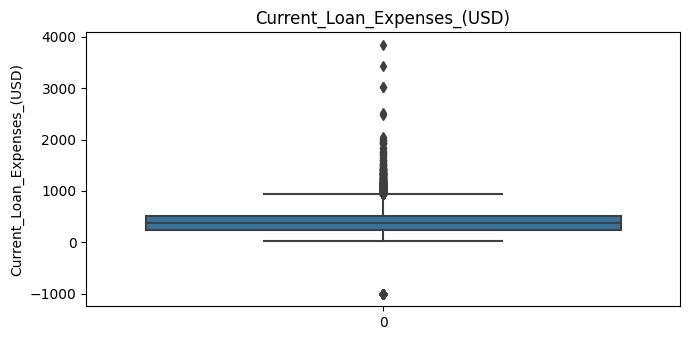

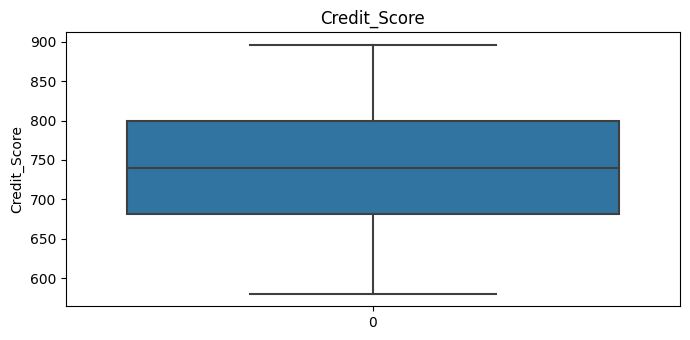

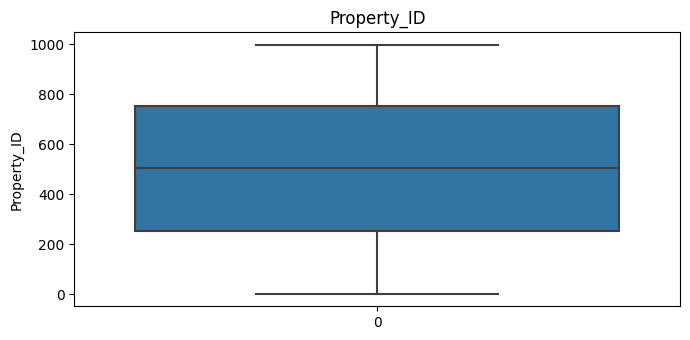

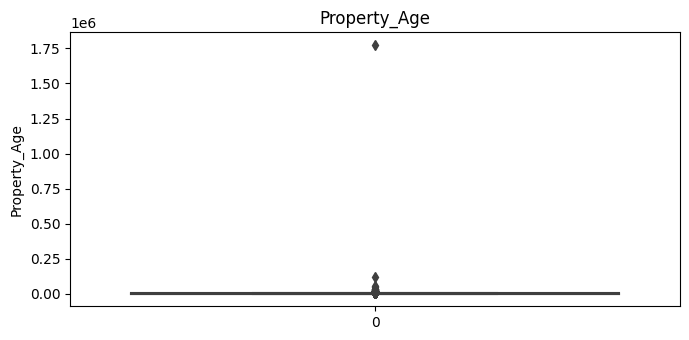

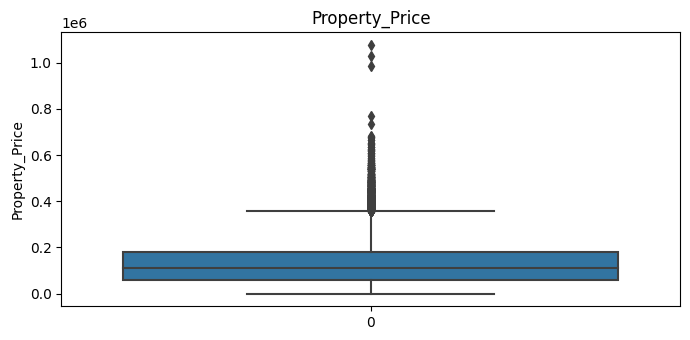

In [307]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        sns.boxplot(df[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## 2.Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Outlier Handling
2. Missing values
3. Encoding Categorical Variables
4. Normalisation of Variables

#### B1. Outlier Handling

Outlier Handling in Income_USD column

In [308]:
IQR=df.Income_USD.quantile(0.75)-df.Income_USD.quantile(0.25)
lower_bridge=df['Income_USD'].quantile(0.25)-(IQR*3)
upper_bridge=df['Income_USD'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['Income_USD']<=lower_bridge,'Income_USD']=lower_bridge
df.loc[df['Income_USD']>=upper_bridge,'Income_USD']=upper_bridge

-2669.9475000000007
7410.997500000001


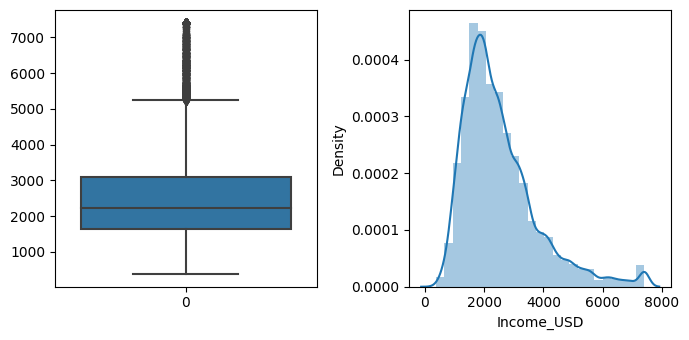

In [309]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['Income_USD'],ax=axes[0])
sns.distplot(df['Income_USD'],bins=25, ax=axes[1])
plt.show()

Outlier Handling in Property_Age

In [310]:
IQR=df['Property_Age'].quantile(0.75)-df['Property_Age'].quantile(0.25)
lower_bridge=df['Property_Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Property_Age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['Property_Age']>=upper_bridge,'Property_Age']=upper_bridge
df.loc[df['Property_Age']<=lower_bridge,'Property_Age']=lower_bridge

-2672.4225000000006
7414.280000000001


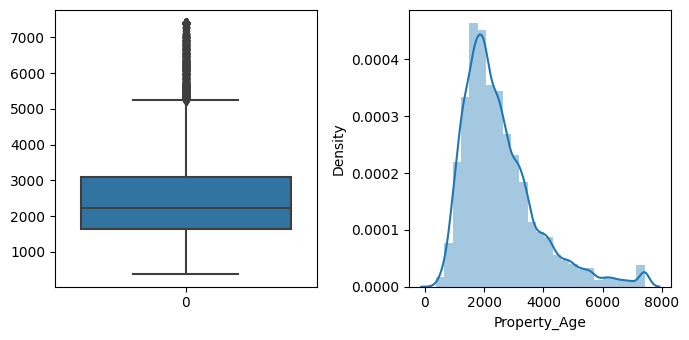

In [311]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['Property_Age'],ax=axes[0])
sns.distplot(df['Property_Age'],bins=25, ax=axes[1])
plt.show()

Outlier Handling in Loan_Amount_Request_(USD) column

In [312]:
IQR=df['Loan_Amount_Request_(USD)'].quantile(0.75)-df['Loan_Amount_Request_(USD)'].quantile(0.25)
lower_bridge=df['Loan_Amount_Request_(USD)'].quantile(0.25)-(IQR*3)
upper_bridge=df['Loan_Amount_Request_(USD)'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['Loan_Amount_Request_(USD)']>=upper_bridge,'Loan_Amount_Request_(USD)']=upper_bridge
df.loc[df['Loan_Amount_Request_(USD)']<=lower_bridge,'Loan_Amount_Request_(USD)']=lower_bridge

-195182.79499999998
356325.15499999997


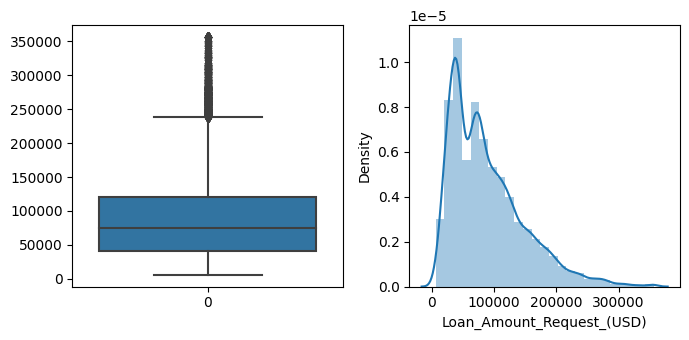

In [313]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['Loan_Amount_Request_(USD)'],ax=axes[0])
sns.distplot(df['Loan_Amount_Request_(USD)'],bins=25, ax=axes[1])
plt.show()

Outlier Handling in Current_Loan_Expenses_(USD) column

In [314]:
IQR=df['Current_Loan_Expenses_(USD)'].quantile(0.75)-df['Current_Loan_Expenses_(USD)'].quantile(0.25)
lower_bridge=df['Current_Loan_Expenses_(USD)'].quantile(0.25)-(IQR*3)
upper_bridge=df['Current_Loan_Expenses_(USD)'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['Current_Loan_Expenses_(USD)']>=upper_bridge,'Current_Loan_Expenses_(USD)']=upper_bridge
df.loc[df['Current_Loan_Expenses_(USD)']<=lower_bridge,'Current_Loan_Expenses_(USD)']=lower_bridge

-573.2075
1342.1675


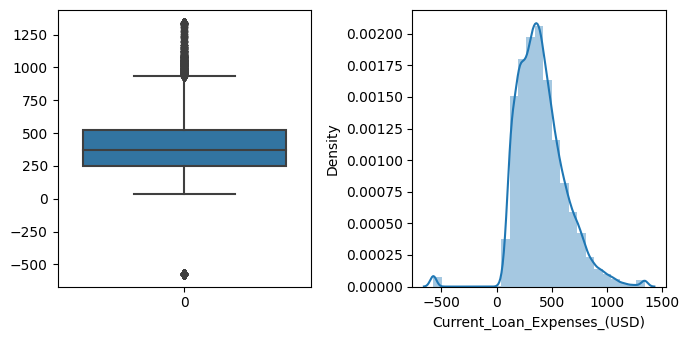

In [315]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['Current_Loan_Expenses_(USD)'], ax=axes[0])
sns.distplot(df['Current_Loan_Expenses_(USD)'],bins=25, ax=axes[1])
plt.show()

Outlier Handling in Property_Price column

In [316]:
IQR=df['Property_Price'].quantile(0.75)-df['Property_Price'].quantile(0.25)
lower_bridge=df['Property_Price'].quantile(0.25)-(IQR*3)
upper_bridge=df['Property_Price'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['Property_Price']>=upper_bridge,'Property_Price']=upper_bridge
df.loc[df['Property_Price']<=lower_bridge,'Property_Price']=lower_bridge

-294353.52
533806.4


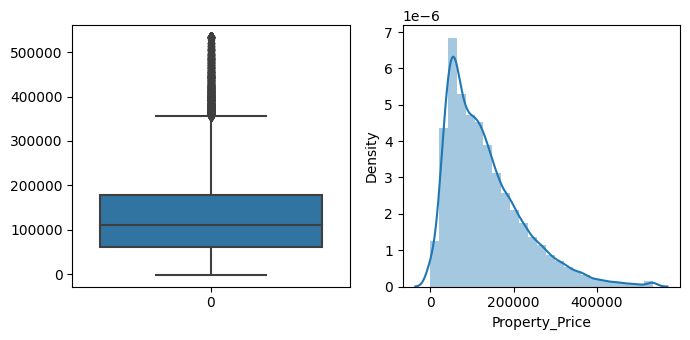

In [317]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['Property_Price'], ax=axes[0])
sns.distplot(df['Property_Price'],bins=25, ax=axes[1])
plt.show()

#### B2. Filling Missing Value

In [318]:
df.isnull().mean()*100

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income_USD                     15.253333
Income_Stability                5.610000
Profession                      0.000000
Location                        0.000000
Loan_Amount_Request_(USD)       0.000000
Current_Loan_Expenses_(USD)     0.573333
Expense_Type_1                  0.000000
Expense_Type_2                  0.000000
Dependents                      8.310000
Credit_Score                    5.676667
No_of_Defaults                  0.000000
Has_Active_Credit_Card          5.220000
Property_ID                     0.000000
Property_Age                   16.166667
Property_Type                   0.000000
Property_Location               1.186667
Co-Applicant                    0.000000
Property_Price                  0.000000
Loan_Sanction_Amount_(USD)      1.133333
dtype: float64

Categorical Variables: Gender, Income Stability, Type of Employment, Has_Active_Credit_Card, Property_Location

Filling missing values using mode

In [319]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Income_Stability'].fillna(df['Income_Stability'].mode()[0],inplace=True)
df['Has_Active_Credit_Card'].fillna(df['Has_Active_Credit_Card'].mode()[0],inplace=True)
df["Property_Location"].fillna(df["Property_Location"].mode()[0],inplace=True)

Numerical Variable

Filling missing values based on distribution of the curve

In [320]:
df['Income_USD'].fillna(df['Income_USD'].median(),inplace=True)  # As the distribution graph is left skewed
df['Current_Loan_Expenses_(USD)'].fillna(df['Current_Loan_Expenses_(USD)'].mean(),inplace=True) # As the graph is normally distributed
df['Credit_Score'].fillna(df['Credit_Score'].median(),inplace=True) # As the graph is normally distributed
df['Loan_Sanction_Amount_(USD)'].fillna(df['Loan_Sanction_Amount_(USD)'].median(),inplace=True)  # As the distribution graph is left skewed
df['Property_Age'].fillna(df['Property_Age'].median(),inplace=True)  # As the distribution graph is left skewed
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True) # As only 10 categories are there
df.isnull().mean()*100

Customer ID                    0.00
Name                           0.00
Gender                         0.00
Age                            0.00
Income_USD                     0.00
Income_Stability               0.00
Profession                     0.00
Location                       0.00
Loan_Amount_Request_(USD)      0.00
Current_Loan_Expenses_(USD)    0.00
Expense_Type_1                 0.00
Expense_Type_2                 0.00
Dependents                     8.31
Credit_Score                   0.00
No_of_Defaults                 0.00
Has_Active_Credit_Card         0.00
Property_ID                    0.00
Property_Age                   0.00
Property_Type                  0.00
Property_Location              0.00
Co-Applicant                   0.00
Property_Price                 0.00
Loan_Sanction_Amount_(USD)     0.00
dtype: float64

#### B3. Performing imputaion and applying label encoder for categorical column

In [321]:
df['Income_Stability'] =df['Income_Stability'].replace("Low",0)
df['Income_Stability'] =df['Income_Stability'].replace("High",1)

In [322]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['Gender'])
df['Gender']=le.transform(df['Gender'])

In [323]:
d = np.asarray(df['Location']).reshape(-1,1)
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit(d)
df['Location']=oe.transform(d)

In [324]:
df['Profession'].value_counts()
p = np.asarray(df['Profession']).reshape(-1,1)
oe.fit(p)
df['Profession']=oe.transform(p)

In [325]:
le.fit(df['Expense_Type_1'])
df['Expense_Type_1']=le.transform(df['Expense_Type_1'])

In [326]:
le.fit(df['Expense_Type_2'])
df['Expense_Type_2']=le.transform(df['Expense_Type_2'])

In [327]:
df['Property_Location'].value_counts()
l= np.asarray(df['Property_Location']).reshape(-1,1)
oe.fit(l)
df['Property_Location']=oe.transform(l)

In [328]:
df['Has_Active_Credit_Card'].value_counts()
c = np.asarray(df['Has_Active_Credit_Card']).reshape(-1,1)
oe.fit(c)
df['Has_Active_Credit_Card']=oe.transform(c)

In [329]:
df.head()

,Customer ID,Name,Gender,Age,Income_USD,Income_Stability,Profession,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),...,Credit_Score,No_of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,C-36995,Frederica Shealy,0,56,1933.050,0,7.0,1.0,72809.58,241.08,...,809.44,0,0.0,746,1933.05,4,0.0,1,119933.46,54607.18
1,C-33999,America Calderone,1,32,4952.910,0,7.0,1.0,46837.47,495.81,...,780.40,0,2.0,608,4952.91,2,0.0,1,54791.00,37469.98
2,C-3770,Rosetta Verne,0,65,988.190,1,3.0,1.0,45593.04,171.95,...,833.15,0,2.0,546,988.19,2,2.0,0,72440.58,36474.43
3,C-26480,Zoe Chitty,0,65,2222.435,1,3.0,0.0,80057.92,298.54,...,832.70,1,2.0,890,2223.25,2,1.0,1,121441.51,56040.54
4,C-23459,Afton Venema,0,31,2614.770,0,7.0,1.0,113858.89,491.41,...,745.55,1,0.0,715,2614.77,4,1.0,1,208567.91,74008.28


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       30000 non-null  int64  
 3   Age                          30000 non-null  int64  
 4   Income_USD                   30000 non-null  float64
 5   Income_Stability             30000 non-null  int64  
 6   Profession                   30000 non-null  float64
 7   Location                     30000 non-null  float64
 8   Loan_Amount_Request_(USD)    30000 non-null  float64
 9   Current_Loan_Expenses_(USD)  30000 non-null  float64
 10  Expense_Type_1               30000 non-null  int64  
 11  Expense_Type_2               30000 non-null  int64  
 12  Dependents                   27507 non-null  float64
 13  Credit_Score    

#### B4. Normalisation of variables

If you see a bell-curve in your data then standardization is more preferable. For this, you will have to plot your data. If your dataset has extremely high or low values (outliers) then standardization is more preferred because usually, normalization will compress these values into a small range.

In [331]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1=df[df.columns[2:]]
x_scaled = scale.fit_transform(df1)
df1= pd.DataFrame(x_scaled)
df1.columns=df.columns[2:]
df1.head()

,Gender,Age,Income_USD,Income_Stability,Profession,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Expense_Type_1,Expense_Type_2,...,Credit_Score,No_of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount_(USD)
0,-1.007092,0.991451,-0.464146,-0.305833,0.834973,0.142149,-0.269479,-0.722680,-0.749241,-1.433524,...,0.992493,-0.490502,-1.126689,0.846998,-0.464823,1.376731,-1.214540,0.076982,-0.125782,0.148002
1,0.992958,-0.504355,2.120004,-0.305833,0.834973,0.142149,-0.707870,0.417485,-0.749241,0.697582,...,0.578136,-0.490502,1.299777,0.368086,2.136143,-0.411309,-1.214540,0.076982,-0.829839,-0.209288
2,-1.007092,1.552379,-1.272680,3.269763,-0.686548,0.142149,-0.728875,-1.032104,-0.749241,0.697582,...,1.330799,-0.490502,1.299777,0.152923,-1.278619,-0.411309,1.283229,0.063579,-0.639083,-0.230044
3,-1.007092,1.552379,-0.216513,3.269763,-0.686548,-1.762481,-0.147132,-0.465490,-0.749241,0.697582,...,1.324379,2.038728,1.299777,1.346732,-0.214878,-0.411309,0.034344,0.076982,-0.109483,0.177886
4,-1.007092,-0.566680,0.119215,-0.305833,0.834973,0.142149,0.423405,0.397791,-0.749241,0.697582,...,0.080879,2.038728,-1.126689,0.739417,0.122333,1.376731,0.034344,0.076982,0.832175,0.552492


## 3. Feature Selection

Performing feature selection using Correlation matrix.
Here we will select only highly correlated variable with target column.

<Axes: >

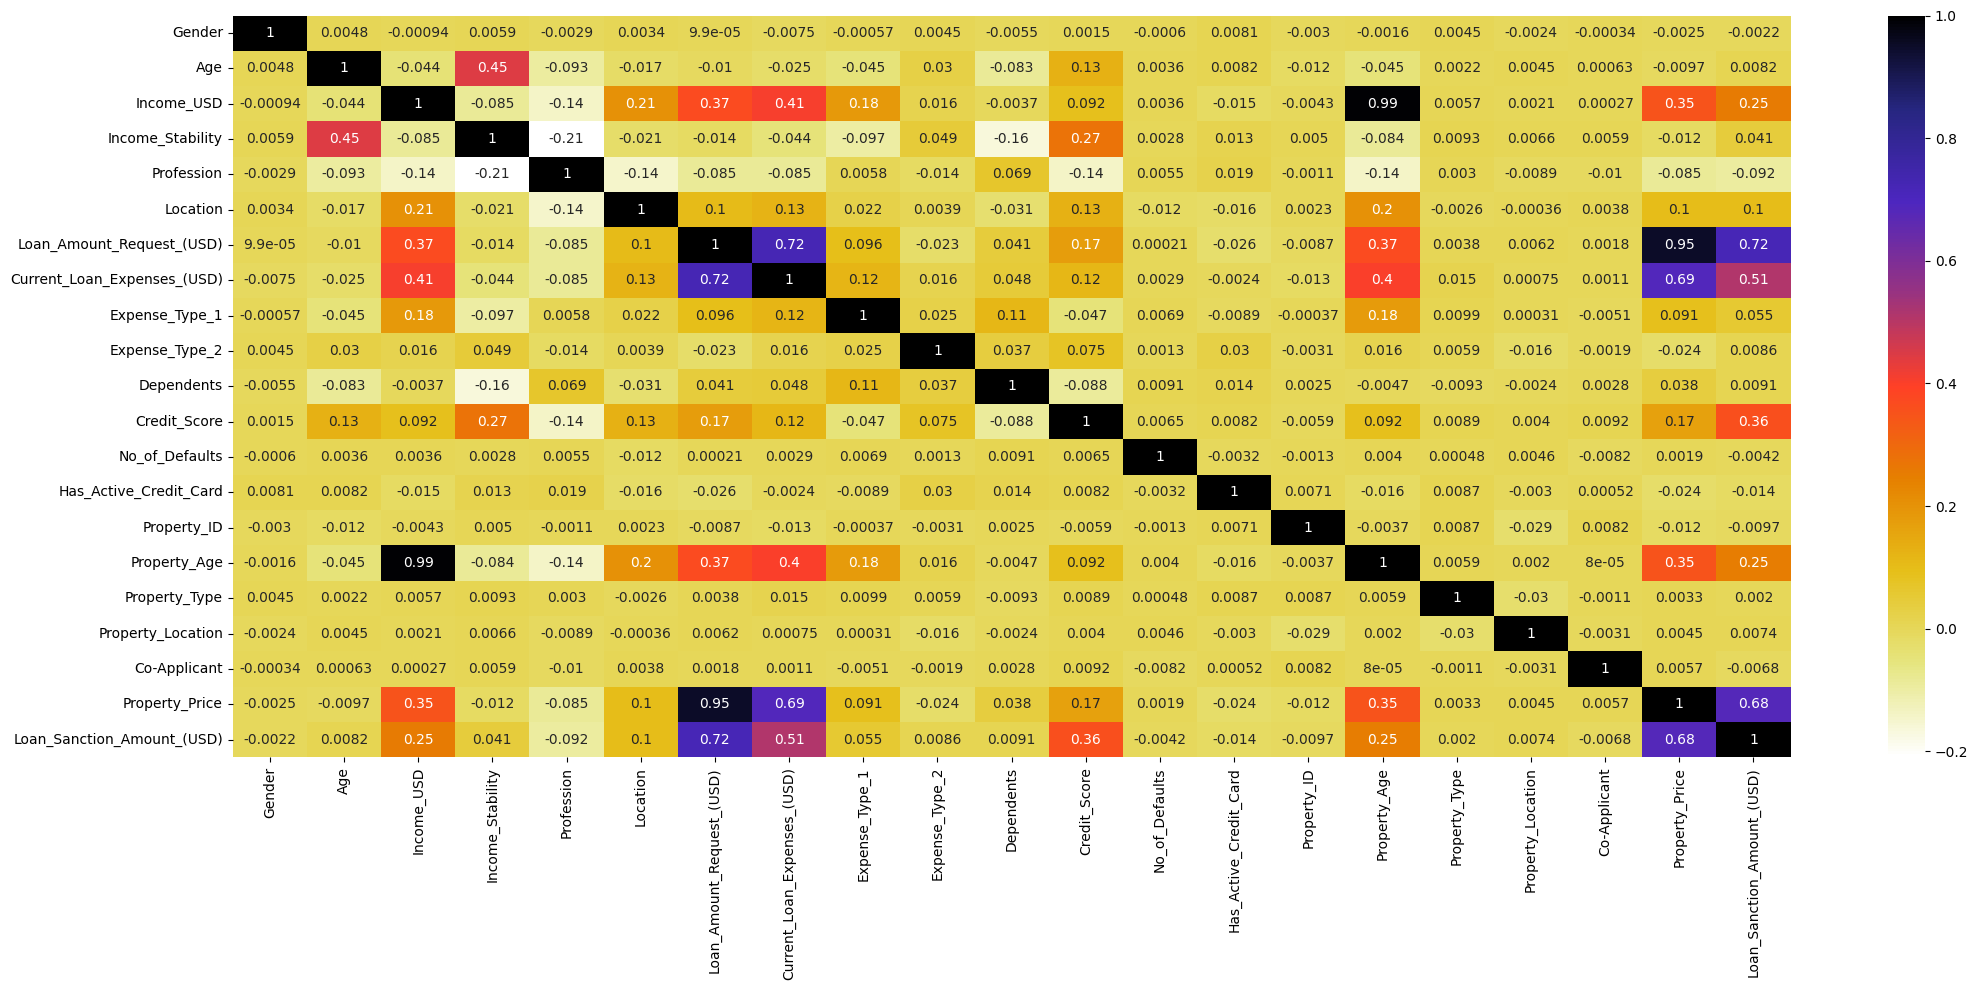

In [332]:
df1.corr()
plt.figure(figsize=(22,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [333]:
df1[df1.columns[:]].corr()['Loan_Sanction_Amount_(USD)'][:]

Gender                        -0.002207
Age                            0.008176
Income_USD                     0.254701
Income_Stability               0.040784
Profession                    -0.092206
Location                       0.100637
Loan_Amount_Request_(USD)      0.721170
Current_Loan_Expenses_(USD)    0.509028
Expense_Type_1                 0.055329
Expense_Type_2                 0.008618
Dependents                     0.009139
Credit_Score                   0.357442
No_of_Defaults                -0.004219
Has_Active_Credit_Card        -0.013859
Property_ID                   -0.009739
Property_Age                   0.251523
Property_Type                  0.001960
Property_Location              0.007373
Co-Applicant                  -0.006756
Property_Price                 0.681955
Loan_Sanction_Amount_(USD)     1.000000
Name: Loan_Sanction_Amount_(USD), dtype: float64

Highly correlated variable with target variable are:
Income_USD, Location,Loan_Amount_Request_(USD), Current_Loan_Expenses (USD), Credit_Score, Property_Age, Property_Price, Profession.

Reduced from 22 features to 8 features.

### 4. Model Training and Model Evaluation

In [334]:
## Capture the dependent feature
y=df1[['Loan_Sanction_Amount_(USD)']]
## drop dependent feature from dataset
X=df1[['Income_USD','Location','Loan_Amount_Request_(USD)', 'Current_Loan_Expenses_(USD)', 'Credit_Score', 'Property_Age', 'Property_Price','Profession']]
X.head()

,Income_USD,Location,Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Credit_Score,Property_Age,Property_Price,Profession
0,-0.464146,0.142149,-0.269479,-0.722680,0.992493,-0.464823,-0.125782,0.834973
1,2.120004,0.142149,-0.707870,0.417485,0.578136,2.136143,-0.829839,0.834973
2,-1.272680,0.142149,-0.728875,-1.032104,1.330799,-1.278619,-0.639083,-0.686548
3,-0.216513,-1.762481,-0.147132,-0.465490,1.324379,-0.214878,-0.109483,-0.686548
4,0.119215,0.142149,0.423405,0.397791,0.080879,0.122333,0.832175,0.834973


In [272]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [279]:
# Machine Learning prediction model libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Random Forest Regressor

In [337]:
# set the hyperparameter
# param_grid = {
#     'max_features': [5, 10, 15, 20],
#     'min_samples_leaf': [2, 3, 5, 10],
#     'min_samples_split': [5, 10, 20],
#     'n_estimators': [500, 1000, 1500]
# }

# rf = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X_train, y_train)

# best_grid = grid_search.best_estimator_
# print(best_grid)

In [340]:
# Tunning the RandomForestRegressor
rf = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation,
rf_random = RandomForestRegressor(max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=1000)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomForestRegressor(max_features=10, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=1000)

In [341]:
# Predict the model
pred = rf_random.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mse(y_test, pred))
print("R2_Score : % f" %(r2_score(y_test,pred))) # Higher R2 score
print("MAE : % f" %(mae(y_test,pred)))   # Lower MAE preferred
print("RMSE : % f" %(rmse)) # Lower RMSE preferred

R2_Score :  0.634201
MAE :  0.357082
RMSE :  0.596842


### SVM Regressor

In [343]:
 # create regressor object
svm_r = SVR(kernel='linear')
# Generally, a linear kernel should be used if the data is linearly separable or has many features, a polynomial kernel if it has nonlinear
# patterns or interactions between features, an RBF kernel if it has complex and nonlinear patterns or clusters, and a sigmoid kernel
# if it is binary or looks like a logistic function.

# Fitting the model
svm_r.fit(X_train, y_train)

# Predict the model
pred = svm_r.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mse(y_test, pred))
print("R2_Score : % f" %(r2_score(y_test,pred)))
print("MAE : % f" %(mae(y_test,pred)))
print("RMSE : % f" %(rmse))

R2_Score :  0.478151
MAE :  0.371863
RMSE :  0.712871
